In [ ]:
import pandas as pd
import numpy as np
import itertools

# Define attributes and levels
attributes = {
    'Attribute 1': ['Level 1', 'Level 2', 'Level 3'],
    'Attribute 2': ['Level 1', 'Level 2', 'Level 3'],
    'Attribute 3': ['Level 1', 'Level 2', 'Level 3'],
    'Attribute 4': ['Level 1', 'Level 2', 'Level 3'],
    'Attribute 5': ['Level 1', 'Level 2', 'Level 3']
}

# Generate all possible combinations of the 5 attributes (3^5 combinations)
combinations = pd.DataFrame(
    list(itertools.product(*attributes.values())),
    columns=attributes.keys()
)

# Simulate part-worth utilities for 100 respondents for each level of the attributes
np.random.seed(0)  # For reproducibility
num_respondents = 100
part_worths_per_level = {attr: np.random.normal(0, 0.5, (num_respondents, len(levels)))
                         for attr, levels in attributes.items()}

dict_items([('Attribute 1', ['Level 1', 'Level 2', 'Level 3']), ('Attribute 2', ['Level 1', 'Level 2', 'Level 3']), ('Attribute 3', ['Level 1', 'Level 2', 'Level 3']), ('Attribute 4', ['Level 1', 'Level 2', 'Level 3']), ('Attribute 5', ['Level 1', 'Level 2', 'Level 3'])])

In [7]:
# Calculate total utility for each combination for each respondent
respondent_utilities = []

for i in range(num_respondents):
    utilities = []
    for _, row in combinations.iterrows():
        total_utility = sum(
            part_worths_per_level[attr][i, list(attributes[attr]).index(row[attr])]
            for attr in attributes.keys()
        )
        utilities.append(total_utility)
    respondent_utilities.append(utilities)

# Convert to DataFrame: rows are combinations, columns are respondents
utility_df = pd.DataFrame(respondent_utilities).T
utility_df.columns = [f'Respondent {i+1}' for i in range(num_respondents)]

utility_df

,Respondent 1,Respondent 2,Respondent 3,Respondent 4,Respondent 5,Respondent 6,Respondent 7,Respondent 8,Respondent 9,Respondent 10,...,Respondent 91,Respondent 92,Respondent 93,Respondent 94,Respondent 95,Respondent 96,Respondent 97,Respondent 98,Respondent 99,Respondent 100
0,-1.725503,1.318549,-0.072639,0.908700,0.730611,0.943093,0.347628,0.163339,0.310084,1.667816,...,1.506780,-0.080006,-0.321157,1.270892,-1.638086,-0.438765,2.104609,0.407016,-0.985820,-1.007968
1,-2.258684,0.425061,-0.947105,0.868768,1.075141,1.276090,0.694916,1.254675,0.775908,1.362206,...,0.927468,0.060418,0.030134,1.447104,-0.827696,0.210324,0.663919,0.494335,0.752490,-1.424243
2,-0.484908,0.387364,0.139955,0.802818,0.407845,1.181612,1.071523,0.170769,0.556460,1.891210,...,1.205929,-0.087682,0.226551,0.828774,-0.692278,-0.009844,0.264899,1.015100,-0.026434,-0.941684
3,-1.336357,0.797528,-0.404192,-0.164578,-0.808270,0.431694,0.094832,0.187808,1.457329,1.979845,...,0.831839,0.896171,-0.408315,1.727356,-1.665361,-0.224359,1.416336,-0.241669,-1.163286,-1.717020
4,-1.869538,-0.095960,-1.278658,-0.204510,-0.463740,0.764691,0.442121,1.279145,1.923154,1.674235,...,0.252528,1.036596,-0.057024,1.903567,-0.854971,0.424730,-0.024354,-0.154349,0.575024,-2.133294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-1.364983,-2.009396,-0.678478,0.473939,-0.619869,0.267086,-1.624659,0.582171,1.590243,1.009611,...,0.161216,-0.011324,-0.845235,0.899733,-0.484033,1.364966,-0.674632,-1.529165,0.563640,-1.651894
239,0.408793,-2.047093,0.408583,0.407988,-1.287165,0.172607,-1.248052,-0.501734,1.370794,1.538615,...,0.439677,-0.159425,-0.648818,0.281403,-0.348614,1.144797,-1.073652,-1.008401,-0.215284,-1.169336
240,-0.306310,0.221318,1.268679,0.221943,-0.554048,-0.170204,-2.544903,-1.069006,-0.183610,1.868641,...,1.704372,-1.100531,-1.632606,-0.236399,-2.063089,1.117757,0.835895,-1.784768,-1.684067,0.065172
241,-0.839491,-0.672170,0.394212,0.182012,-0.209518,0.162793,-2.197615,0.022331,0.282214,1.563031,...,1.125061,-0.960107,-1.281315,-0.060188,-1.252699,1.766846,-0.604794,-1.697448,0.054243,-0.351103


In [9]:
# Exponential transformation (logit model)
exp_utility_df = np.exp(utility_df)

# Sum exponential utilities across all combinations for each respondent
exp_sum_per_respondent = exp_utility_df.sum(axis=0)

# Calculate preference shares for each combination and respondent
preference_shares_df = exp_utility_df.div(exp_sum_per_respondent, axis=1)

# Average the preference shares across all respondents for each combination
average_preference_shares = preference_shares_df.mean(axis=1) * 100  # Convert to percentages

# Add the average preference share to the combinations DataFrame
combinations['Average Preference Share (%)'] = average_preference_shares

combinations


,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Average Preference Share (%)
0,Level 1,Level 1,Level 1,Level 1,Level 1,0.437211
1,Level 1,Level 1,Level 1,Level 1,Level 2,0.455583
2,Level 1,Level 1,Level 1,Level 1,Level 3,0.442712
3,Level 1,Level 1,Level 1,Level 2,Level 1,0.473107
4,Level 1,Level 1,Level 1,Level 2,Level 2,0.499333
...,...,...,...,...,...,...
238,Level 3,Level 3,Level 3,Level 2,Level 2,0.396492
239,Level 3,Level 3,Level 3,Level 2,Level 3,0.392742
240,Level 3,Level 3,Level 3,Level 3,Level 1,0.394429
241,Level 3,Level 3,Level 3,Level 3,Level 2,0.367390


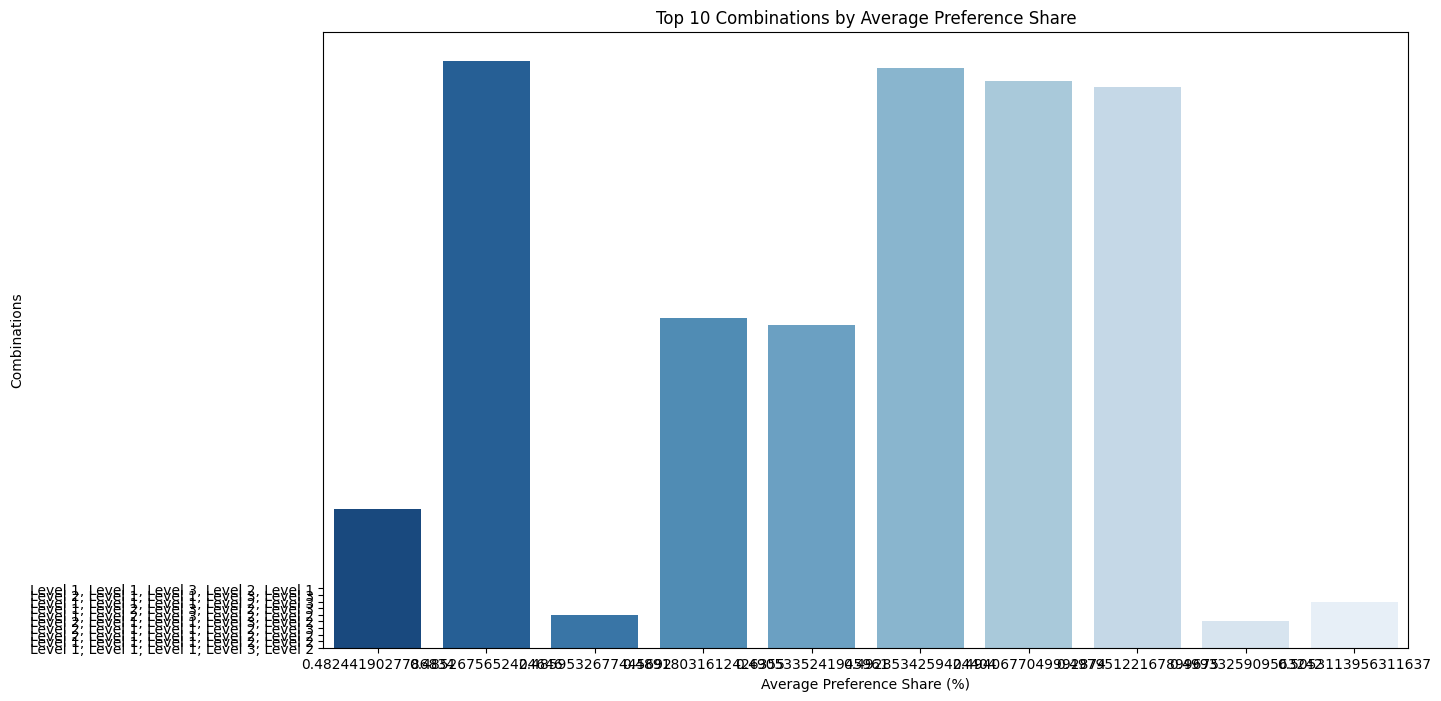

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort combinations by average preference share
combinations_sorted = combinations.sort_values(by='Average Preference Share (%)', ascending=False)

# Plot the top 10 combinations
plt.figure(figsize=(14, 8))
sns.barplot(
    x=combinations_sorted['Average Preference Share (%)'][:10],
    y=combinations_sorted.index[:10],
    palette="Blues_r"
)
plt.title('Top 10 Combinations by Average Preference Share')
plt.xlabel('Average Preference Share (%)')
plt.ylabel('Combinations')
plt.yticks(ticks=range(10), labels=[
    ', '.join(combinations_sorted.iloc[i, :-1]) for i in range(10)
], rotation=0)
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Define top 10 combinations manually (example data)
top_10_combinations = pd.DataFrame({
    'Combination': [
        'A1-E1', 'A1-E2', 'A1-E3', 'A2-E1', 'A2-E2', 'A2-E3',
        'A3-E1', 'A3-E2', 'A3-E3', 'A3-E2'
    ],
    'Attribute A': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A3', 'A3', 'A3', 'A3'],
    'Attribute E': ['E1', 'E2', 'E3', 'E1', 'E2', 'E3', 'E1', 'E2', 'E3', 'E2'],
    'Utility': np.random.uniform(0, 1, 10)  # Example utilities for each combination
})


In [12]:
# Exponential transformation for logit model
top_10_combinations['Exp_Utility'] = np.exp(top_10_combinations['Utility'])

# Normalize to get preference shares
top_10_combinations['Preference Share (%)'] = (
    top_10_combinations['Exp_Utility'] / top_10_combinations['Exp_Utility'].sum()
) * 100


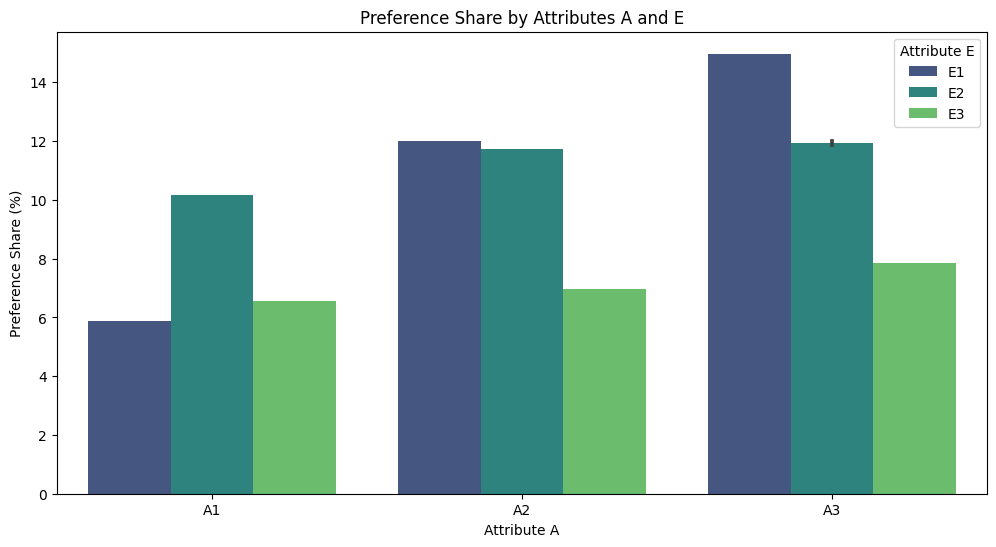

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot preference shares by Attribute A and E
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Attribute A', 
    y='Preference Share (%)', 
    hue='Attribute E', 
    data=top_10_combinations, 
    palette='viridis'
)
plt.title('Preference Share by Attributes A and E')
plt.xlabel('Attribute A')
plt.ylabel('Preference Share (%)')
plt.legend(title='Attribute E')
plt.show()


In [14]:
import pandas as pd
import numpy as np

# Example respondent data
num_respondents = 100
respondent_data = pd.DataFrame({
    'Respondent ID': range(1, num_respondents + 1),
    'Income': np.random.choice(['Low', 'Medium', 'High'], num_respondents)  # Example income groups
})

# Simulated preference data for each respondent for the top 10 combinations
preference_data = pd.DataFrame(
    np.random.rand(num_respondents, 10),  # Random preferences for demonstration
    columns=[f'Combination {i+1}' for i in range(10)]
)
preference_data['Respondent ID'] = range(1, num_respondents + 1)

# Merge respondent data with preference data
combined_data = pd.merge(respondent_data, preference_data, on='Respondent ID')


In [15]:
# Melt the preference data to long format for easier aggregation and plotting
long_format = combined_data.melt(
    id_vars=['Respondent ID', 'Income'],
    var_name='Combination',
    value_name='Preference Score'
)

# Group by income and combination to find average preference scores
avg_preferences = long_format.groupby(['Income', 'Combination'])['Preference Score'].mean().reset_index()


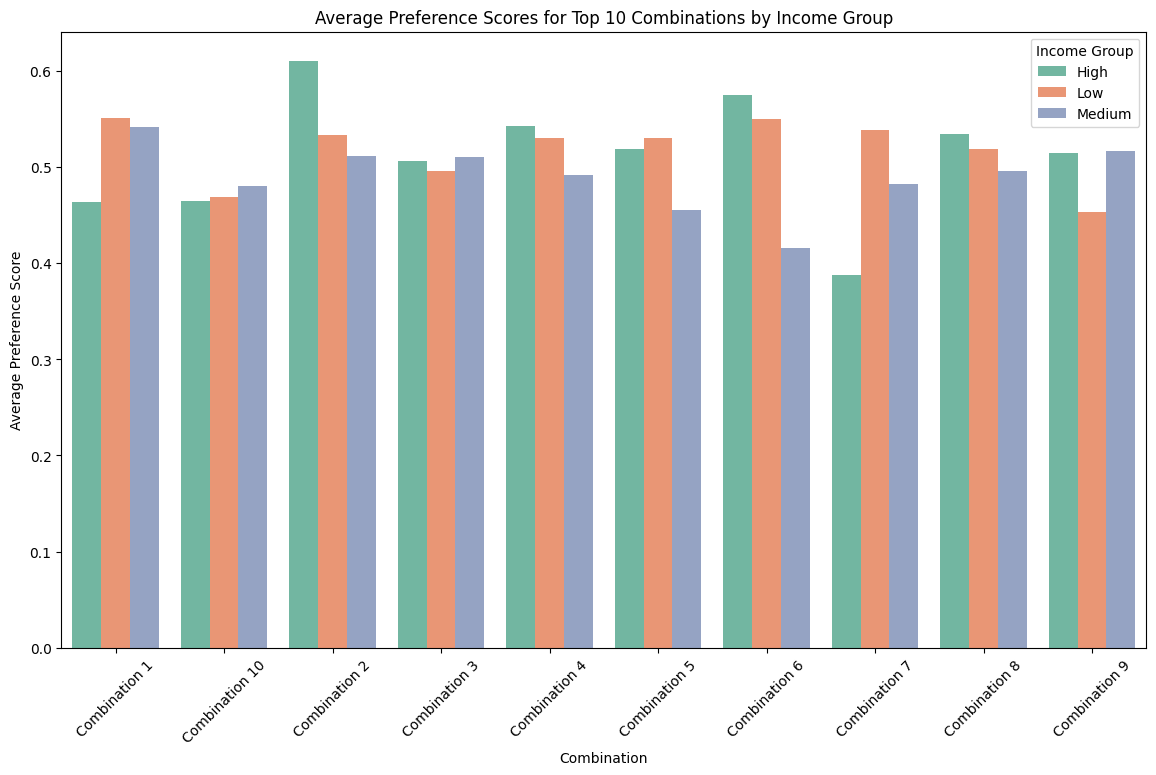

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average preferences for combinations by income group
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Combination',
    y='Preference Score',
    hue='Income',
    data=avg_preferences,
    palette='Set2'
)
plt.title('Average Preference Scores for Top 10 Combinations by Income Group')
plt.xlabel('Combination')
plt.ylabel('Average Preference Score')
plt.legend(title='Income Group')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Visualize using a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Combination',
    y='Preference Score',
    hue='Income',
    data=long_format,
    split=True,  # To show both distributions side-by-side
    inner="quartile",  # Show quartile lines
    palette='Set3'
)
plt.title('Distribution of Preference Scores for Combinations by Income Group')
plt.xlabel('Combination')
plt.ylabel('Preference Score')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.show()


ValueError: There must be exactly two hue levels to use `split`.'

<Figure size 1400x800 with 0 Axes>

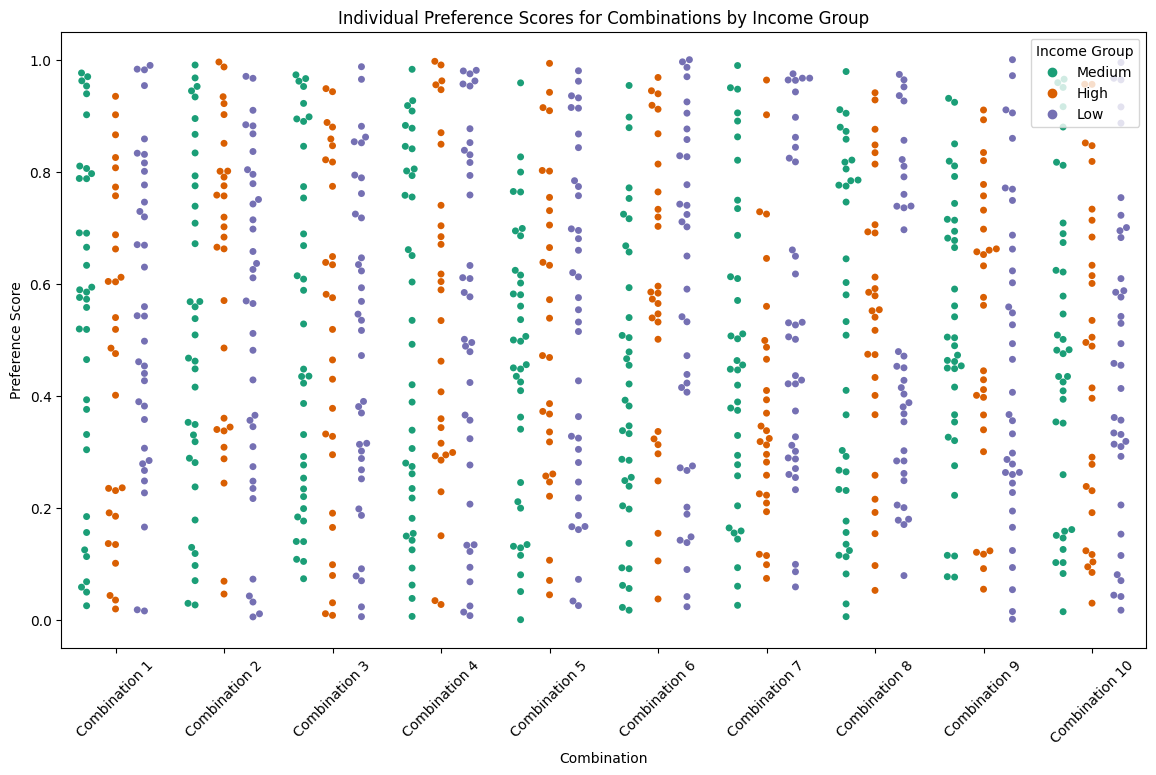

In [18]:
# Visualize using a swarm plot
plt.figure(figsize=(14, 8))
sns.swarmplot(
    x='Combination',
    y='Preference Score',
    hue='Income',
    data=long_format,
    dodge=True,  # Separate points by hue
    palette='Dark2'
)
plt.title('Individual Preference Scores for Combinations by Income Group')
plt.xlabel('Combination')
plt.ylabel('Preference Score')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.show()


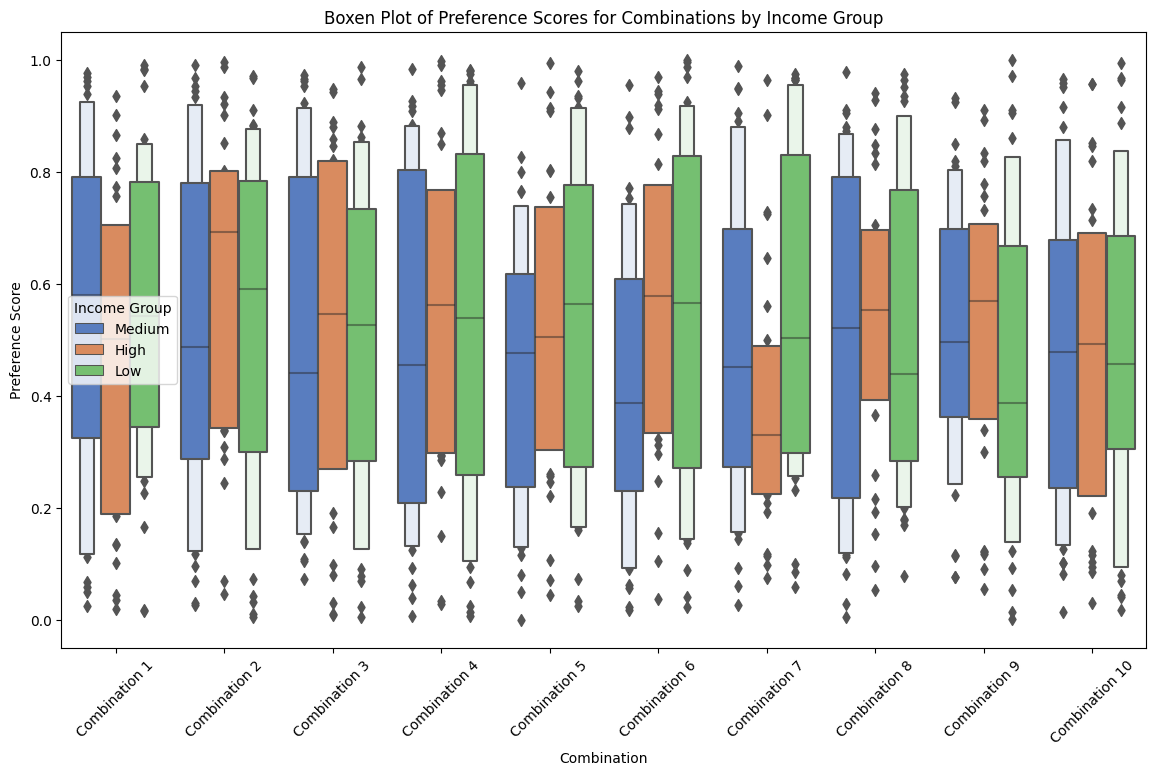

In [19]:
# Visualize using a boxen plot
plt.figure(figsize=(14, 8))
sns.boxenplot(
    x='Combination',
    y='Preference Score',
    hue='Income',
    data=long_format,
    palette='muted'
)
plt.title('Boxen Plot of Preference Scores for Combinations by Income Group')
plt.xlabel('Combination')
plt.ylabel('Preference Score')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.show()


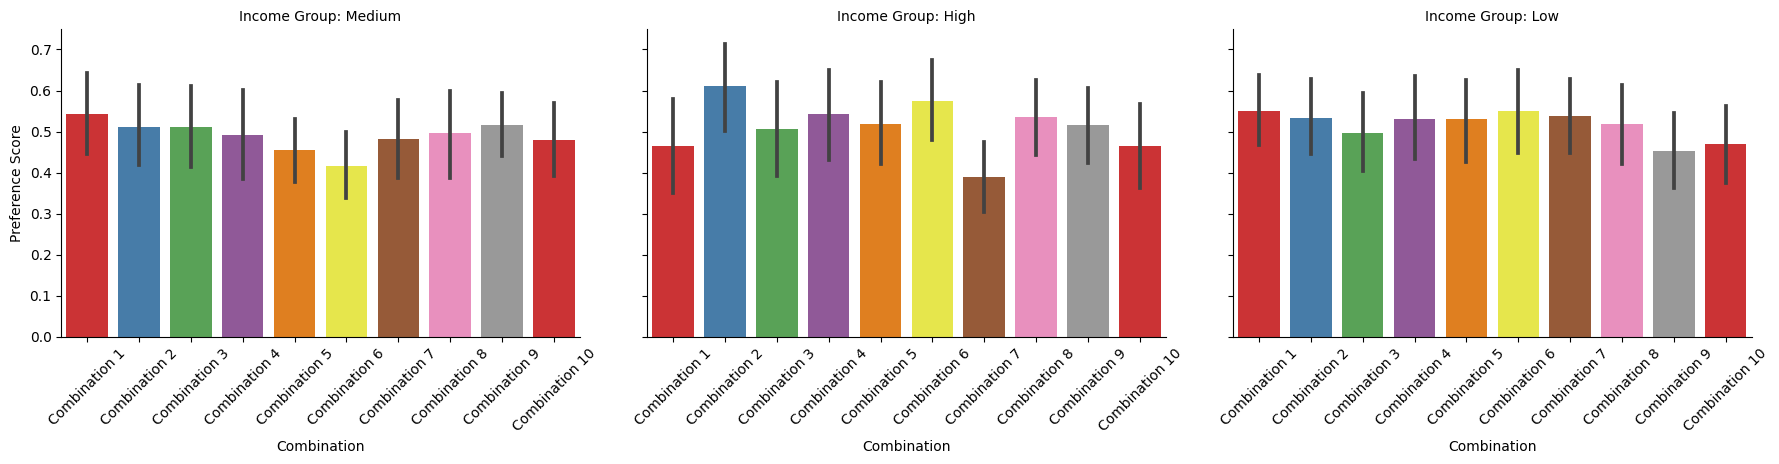

In [20]:
# Create a FacetGrid for income groups
g = sns.FacetGrid(long_format, col="Income", col_wrap=3, height=4, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="Combination", y="Preference Score", palette="Set1")
g.set_titles("Income Group: {col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Combination", "Preference Score")
plt.show()
